In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

# Caminho para o arquivo CSV
caminho_arquivo = 'Data/netflix_titles.csv'

# Carregar o arquivo CSV em um dataframe
df = pd.read_csv('Data/netflix_titles.csv')

# Exibir o dataframe
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
# Dropando colunas que não serão utilizadas
df = df.drop(columns=['show_id','type','cast','date_added','rating', 'country', 'director'])
df

,title,release_year,duration,listed_in,description
0,Dick Johnson Is Dead,2020,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...
8802,Zodiac,2007,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,2018,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Zombieland,2009,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Zoom,2006,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
# Verificando valores nulos
df.isnull().sum()

title           0
release_year    0
duration        3
listed_in       0
description     0
dtype: int64

In [5]:
# Dropando valores nulos
df = df.dropna()

In [6]:
# Verificando valores nulos
df.isnull().sum()

title           0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
# Verificando valores duplicados
df.duplicated().sum()

0

# Pré-processamento dos Dados

In [8]:
# Função para limpar o texto
def limpar_texto(texto):
    # Converter o texto para minúsculo
    texto = texto.lower()
    # Remover caracteres especiais
    texto = re.sub(r'[^a-z0-9]', ' ', texto)
    return texto

# Aplicar a função de limpeza ao dataframe
df['description'] = df['description'].apply(limpar_texto)
df['description']

0       as her father nears the end of his life  filmm...
1       after crossing paths at a party  a cape town t...
2       to protect his family from a powerful drug lor...
3       feuds  flirtations and toilet talk go down amo...
4       in a city of coaching centers known to train i...
                              ...                        
8802    a political cartoonist  a crime reporter and a...
8803    while living alone in a spooky town  a young g...
8804    looking to survive in a world taken over by zo...
8805    dragged from civilian life  a former superhero...
8806    a scrappy but poor boy worms his way into a ty...
Name: description, Length: 8804, dtype: object

In [9]:
# Verificando se sobrou algum description nulo
df.isnull().sum()

title           0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
# Criar uma máscara booleana para identificar linhas que contêm 'Season' ou 'Seasons' na coluna 'duration'
mask = df['duration'].str.contains(r'Season|Seasons', case=False)

# Dropar as linhas que correspondem à máscara
df = df[~mask]

# Exibir o DataFrame resultante
df

,title,release_year,duration,listed_in,description
0,Dick Johnson Is Dead,2020,90 min,Documentaries,as her father nears the end of his life filmm...
6,My Little Pony: A New Generation,2021,91 min,Children & Family Movies,equestria s divided but a bright eyed hero be...
7,Sankofa,1993,125 min,"Dramas, Independent Movies, International Movies",on a photo shoot in ghana an american model s...
9,The Starling,2021,104 min,"Comedies, Dramas",a woman adjusting to life after a loss contend...
12,Je Suis Karl,2021,127 min,"Dramas, International Movies",after most of her family is murdered in a terr...
...,...,...,...,...,...
8801,Zinzana,2015,96 min,"Dramas, International Movies, Thrillers",recovering alcoholic talal wakes up inside a s...
8802,Zodiac,2007,158 min,"Cult Movies, Dramas, Thrillers",a political cartoonist a crime reporter and a...
8804,Zombieland,2009,88 min,"Comedies, Horror Movies",looking to survive in a world taken over by zo...
8805,Zoom,2006,88 min,"Children & Family Movies, Comedies",dragged from civilian life a former superhero...


In [11]:
# Remover a palavra 'min' dos valores na coluna 'duration'
df['duration'] = df['duration'].str.replace(r'\bmin\b', '', regex=True)

# Exibir o DataFrame resultante
df

,title,release_year,duration,listed_in,description
0,Dick Johnson Is Dead,2020,90,Documentaries,as her father nears the end of his life filmm...
6,My Little Pony: A New Generation,2021,91,Children & Family Movies,equestria s divided but a bright eyed hero be...
7,Sankofa,1993,125,"Dramas, Independent Movies, International Movies",on a photo shoot in ghana an american model s...
9,The Starling,2021,104,"Comedies, Dramas",a woman adjusting to life after a loss contend...
12,Je Suis Karl,2021,127,"Dramas, International Movies",after most of her family is murdered in a terr...
...,...,...,...,...,...
8801,Zinzana,2015,96,"Dramas, International Movies, Thrillers",recovering alcoholic talal wakes up inside a s...
8802,Zodiac,2007,158,"Cult Movies, Dramas, Thrillers",a political cartoonist a crime reporter and a...
8804,Zombieland,2009,88,"Comedies, Horror Movies",looking to survive in a world taken over by zo...
8805,Zoom,2006,88,"Children & Family Movies, Comedies",dragged from civilian life a former superhero...


In [12]:
df['duration'] = df['duration'].apply(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6128 non-null   object
 1   release_year  6128 non-null   int64 
 2   duration      6128 non-null   int64 
 3   listed_in     6128 non-null   object
 4   description   6128 non-null   object
dtypes: int64(2), object(3)
memory usage: 287.2+ KB


In [13]:
# Renomear todas as colunas de uma vez
df = df.rename(columns={
    'title': 'Titulo',
    'release_year': 'Ano',
    'duration': 'Minutagem',
    'listed_in': 'Genero',
    'description': 'Sinopse'
})

# Exibir o DataFrame resultante
df

,Titulo,Ano,Minutagem,Genero,Sinopse
0,Dick Johnson Is Dead,2020,90,Documentaries,as her father nears the end of his life filmm...
6,My Little Pony: A New Generation,2021,91,Children & Family Movies,equestria s divided but a bright eyed hero be...
7,Sankofa,1993,125,"Dramas, Independent Movies, International Movies",on a photo shoot in ghana an american model s...
9,The Starling,2021,104,"Comedies, Dramas",a woman adjusting to life after a loss contend...
12,Je Suis Karl,2021,127,"Dramas, International Movies",after most of her family is murdered in a terr...
...,...,...,...,...,...
8801,Zinzana,2015,96,"Dramas, International Movies, Thrillers",recovering alcoholic talal wakes up inside a s...
8802,Zodiac,2007,158,"Cult Movies, Dramas, Thrillers",a political cartoonist a crime reporter and a...
8804,Zombieland,2009,88,"Comedies, Horror Movies",looking to survive in a world taken over by zo...
8805,Zoom,2006,88,"Children & Family Movies, Comedies",dragged from civilian life a former superhero...


# Analise Estatisctica e Graficos

In [14]:
# Resumo estatístico das colunas 'Ano' e 'Minutagem' com valores arredondados
df.describe().round(2)

,Ano,Minutagem
count,6128.00,6128.00
mean,2013.12,99.58
std,9.68,28.29
min,1942.00,3.00
25%,2012.00,87.00
50%,2016.00,98.00
75%,2018.00,114.00
max,2021.00,312.00


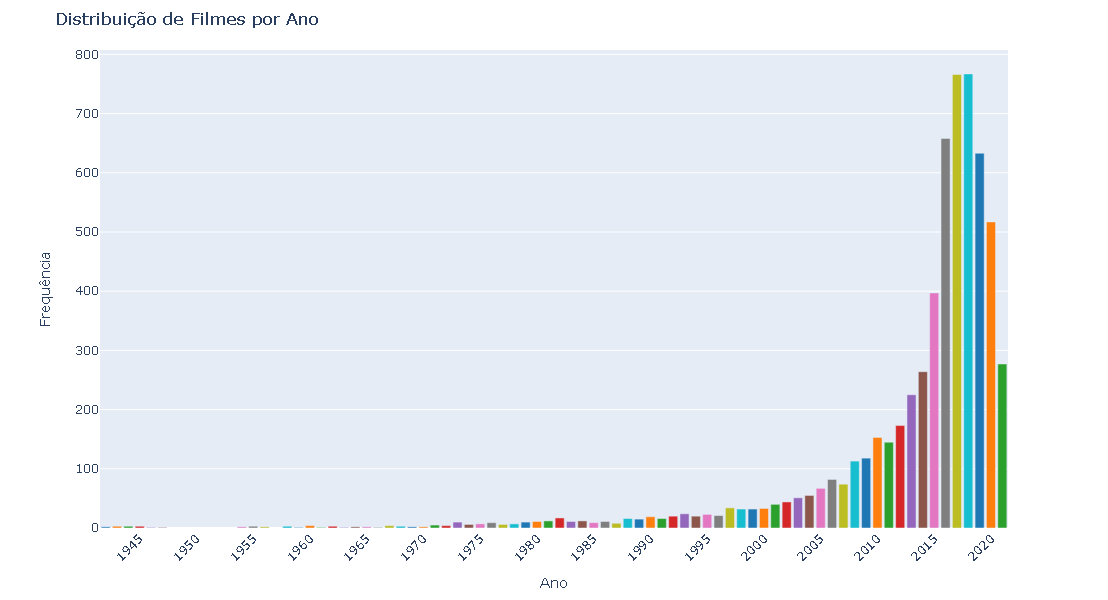

In [42]:
import plotly.graph_objects as go

# Calculando a quantidade de filmes por ano
filmes_por_ano = df['Ano'].value_counts().sort_index()

# Definindo cores RGB para as barras
cores_rgb = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 
             'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 
             'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

# Criando o gráfico de barras
fig = go.Figure()

# Adicionando as barras ao gráfico com cores diferentes para cada barra
for i, (ano, freq) in enumerate(zip(filmes_por_ano.index, filmes_por_ano.values)):
    fig.add_trace(go.Bar(x=[ano], y=[freq], marker_color=cores_rgb[i % len(cores_rgb)]))

# Atualizando o layout do gráfico
fig.update_layout(title='Distribuição de Filmes por Ano',
                  xaxis_title='Ano',
                  yaxis_title='Frequência',
                  xaxis=dict(tickangle=-45, tickmode='linear', tick0=1940, dtick=5),  # Definindo intervalo de 5 anos
                  height=600,  # Altura do gráfico
                  width=1130,  # Largura do gráfico
                  showlegend=False,
                  margin=dict(l=100, r=100, t=50, b=50))  # Definindo as margens

# Mostrando o gráfico
fig.show()

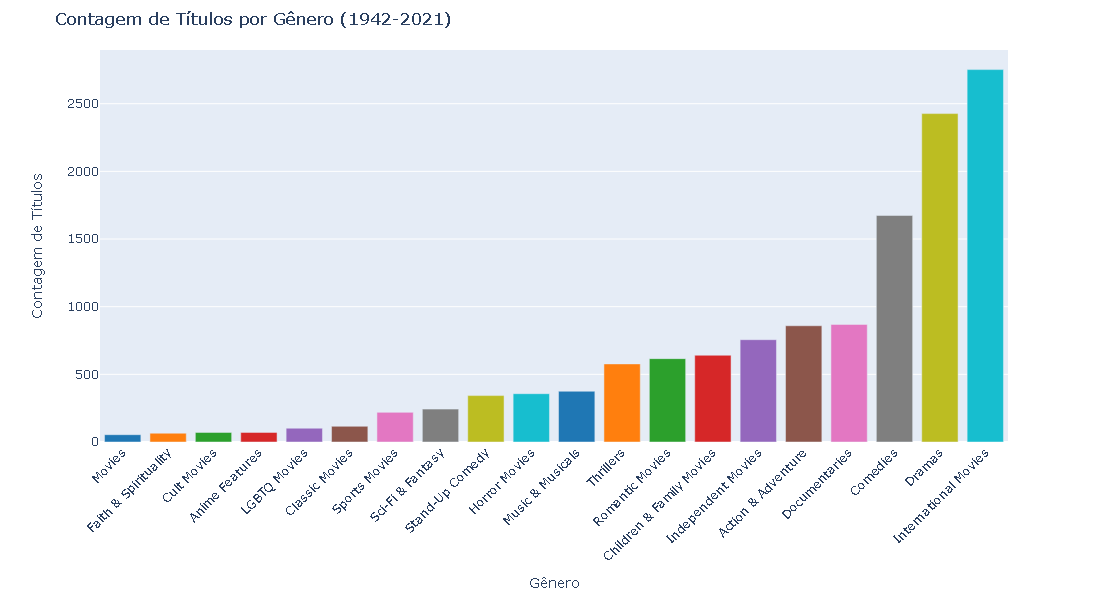

In [43]:
import plotly.graph_objects as go

# Ordenar a contagem de gêneros do menor para o maior
genero_contagem = df['Genero'].str.split(', ', expand=True).stack().value_counts()
genero_contagem = genero_contagem.sort_values()

# Definindo uma paleta de cores
cores_rgb = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 
             'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 
             'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

# Criando o gráfico de barras
fig = go.Figure()

# Adicionando as barras ao gráfico com cores diferentes para cada barra
for i, (genero, contagem) in enumerate(zip(genero_contagem.index, genero_contagem.values)):
    fig.add_trace(go.Bar(x=[genero], y=[contagem], marker_color=cores_rgb[i % len(cores_rgb)]))

# Atualizando o layout do gráfico
fig.update_layout(title='Contagem de Títulos por Gênero (1942-2021)',
                  xaxis_title='Gênero',
                  yaxis_title='Contagem de Títulos',
                  xaxis=dict(tickangle=-45, tickmode='array', tickvals=genero_contagem.index, ticktext=genero_contagem.index),  # Definindo texto do eixo x
                  height=600,  # Altura do gráfico
                  width=1130,  # Largura do gráfico
                  showlegend=False,
                  margin=dict(l=100, r=100, t=50, b=50))  # Definindo as margens

# Mostrando o gráfico
fig.show()

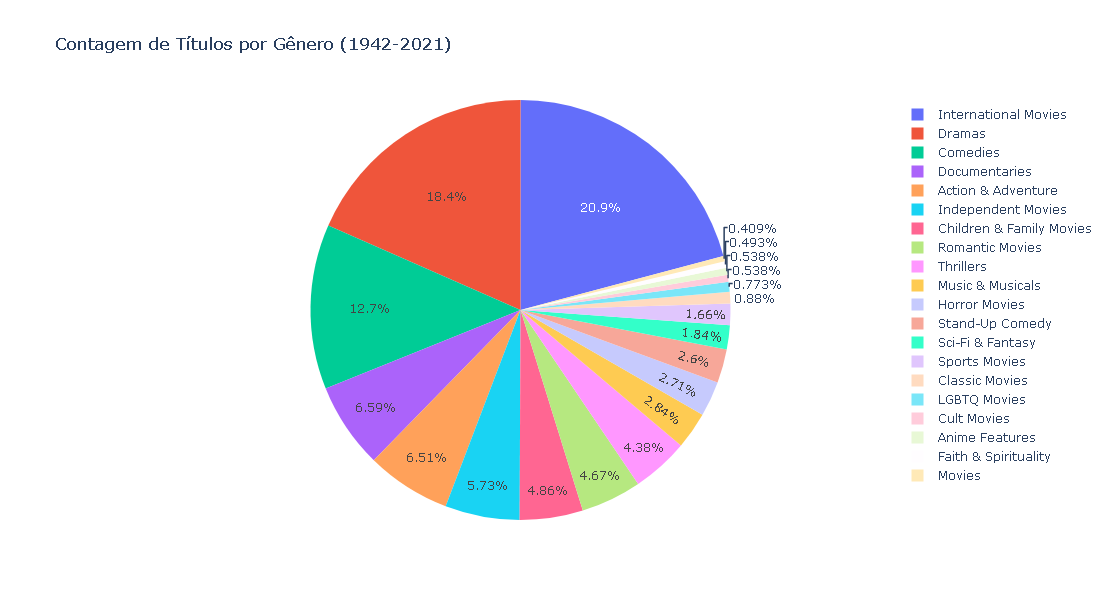

In [52]:
import plotly.graph_objects as go

# Ordenar a contagem de gêneros do menor para o maior
genero_contagem = df['Genero'].str.split(', ', expand=True).stack().value_counts()
genero_contagem = genero_contagem.sort_values()

# Criando o gráfico de pizza
fig = go.Figure()

# Adicionando as fatias de pizza ao gráfico
fig.add_trace(go.Pie(labels=genero_contagem.index, values=genero_contagem.values))

# Atualizando o layout do gráfico
fig.update_layout(title='Contagem de Títulos por Gênero (1942-2021)',
                  height=600,  # Altura do gráfico
                  width=1100)  # Largura do gráfico

# Mostrando o gráfico
fig.show()

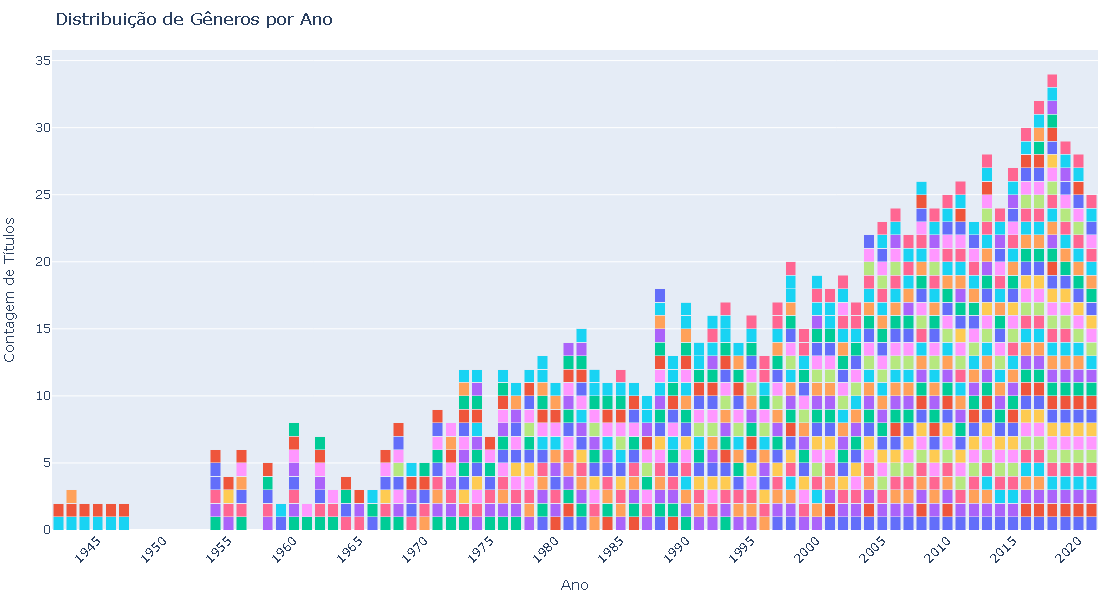

In [53]:
import plotly.graph_objects as go

# Agrupamento por ano e contagem de gêneros
generos_por_ano = df.groupby('Ano')['Genero'].apply(lambda x: ','.join(x)).reset_index()

# Criando um dataframe com dummies para os gêneros
generos_dummies = generos_por_ano['Genero'].str.get_dummies(sep=',')

# Lista de anos
anos = generos_por_ano['Ano']

# Criando lista de figuras para os subplots
fig = go.Figure()

# Adicionando um trace para cada gênero
for genero in generos_dummies.columns:
    fig.add_trace(go.Bar(x=anos, y=generos_dummies[genero], name=genero, showlegend=False))

# Atualizando o layout do gráfico
fig.update_layout(
    title='Distribuição de Gêneros por Ano',
    xaxis_title='Ano',
    yaxis_title='Contagem de Títulos',
    xaxis=dict(tickangle=-45, dtick=5),  # Definindo o intervalo de tick como 1 para mostrar todos os anos
    barmode='stack',
    height=600,  # Altura do gráfico
    width=1100,  # Largura do gráfico
    margin=dict(l=10, r=10, t=50, b=50)  # Margens (esquerda, direita, topo, baixo)
)

# Mostrando o gráfico
fig.show()